# **About Dataset**
**Shop Customer Data** is a comprehensive dataset that provides a **detailed analysis** of a **hypothetical shop's ideal customers**. By collecting and analyzing customer data through **membership cards**, this dataset provides valuable insights that can help a **business better understand its customers**.

The dataset includes **2000 records and 8 columns**, providing a **wealth of information** about the **shop's customer base**. Each column represents a specific aspect of the customer's profile, including their **unique Customer ID, Gender, Age, Annual Income, Spending Score, Profession, Work Experience, and Family Size.**

By analyzing this data, businesses can gain **valuable insights** into their **customers' preferences**, **behaviors, and purchasing habits**. For example, they can **segment customers** by **age, income, or family size** to better understand how these factors impact their purchasing decisions.

<table>
  <thead>
    <tr>
      <th>Feature</th>
      <th>Description</th>
      <th>Data Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Customer ID</td>
      <td>A unique identifier assigned to each customer in the dataset. It is used to differentiate between individual customers and to keep track of their behaviors.</td>
      <td>Categorical</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the customer, either male or female. Gender can be used to analyze purchasing behavior and preferences between genders.</td>
      <td>Categorical</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the customer, usually measured in years. Age can be used to segment customers into different age groups for analyzing purchasing patterns.</td>
      <td>Numeric</td>
    </tr>
    <tr>
      <td>Annual Income</td>
      <td>The annual income of the customer, usually measured in dollars or another currency. Income can be used to segment customers into different income groups.</td>
      <td>Numeric</td>
    </tr>
    <tr>
      <td>Spending Score</td>
      <td>A score assigned by the shop based on the customer's behavior and spending nature. It helps in segmenting customers based on their purchasing patterns.</td>
      <td>Numeric</td>
    </tr>
    <tr>
      <td>Profession</td>
      <td>The occupation or profession of the customer. Profession can be used to analyze purchasing patterns and preferences among different professions.</td>
      <td>Categorical</td>
    </tr>
    <tr>
      <td>Work Experience</td>
      <td>The number of years of work experience of the customer. It can help in segmenting customers based on their level of experience for analyzing purchasing patterns.</td>
      <td>Numeric</td>
    </tr>
    <tr>
      <td>Family Size</td>
      <td>The size of the customer's family, usually measured in terms of the number of family members. Family size can be used to analyze purchasing patterns.</td>
      <td>Numeric</td>
    </tr>
  </tbody>
</table>


# **Set Up**

\# hidden set up
 <!-- %pip install fuzzy_c_means  -->
 <!-- %pip install plotly -->

# **Importing Libraries**

In [2]:
# Data
import numpy as np
import pandas as pd

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Clustering Models
from fcmeans import FCM
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score


# **Data Loading & Processing**
---

In [3]:
df = pd.read_csv("Customers.csv") 
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


Let's have a look at the **feature space**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [5]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

#### Input the missing value by the Mode Value

In [6]:

df.Profession.fillna('mode', inplace=True)
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [8]:
df.rename(columns={ 'Annual Income ($)' : 'Annual Income','Spending Score (1-100)':'Spending Score'}, inplace = True)
df

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


# **Data Preprocessing**

#### Dropping Unesissary colums

In [9]:
df.drop(columns=['CustomerID'], inplace=True) # because it is Unrelavent
columns = df.columns
columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score', 'Profession',
       'Work Experience', 'Family Size'],
      dtype='object')

#### Label encoding
- Label encoding is a technique used to convert categorical variables into numerical values. It assigns a unique numeric label to each unique category in a column. 
- This is useful when working with machine learning algorithms that require numerical input, as they typically cannot directly process categorical data.

In [10]:
categorical_columns = ['Gender', 'Profession']
for cat_col in categorical_columns:
    encoder = LabelEncoder()
    df[cat_col] = encoder.fit_transform(df[cat_col])

In [11]:
print(df.shape)
df.head()

(2000, 7)


,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1
3,0,23,59000,77,7,0,2
4,0,31,38000,40,3,2,6


# **Data Correlation**


<AxesSubplot:>

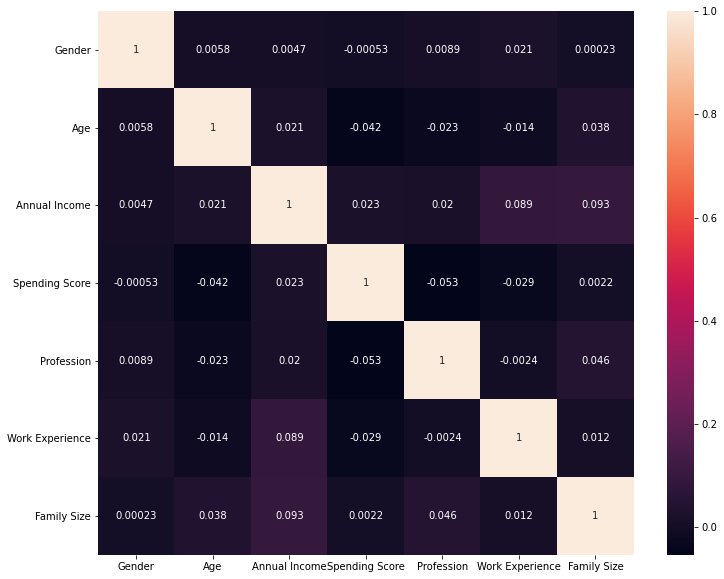

In [12]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df.corr( ),annot=True)

# **Data Sampling**


In [13]:
sampled_data = df.sample(n=200, random_state=42)
sampled_data

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
1860,1,32,104494,28,5,6,4
353,1,23,181760,35,5,14,3
1333,0,97,133614,58,0,7,4
905,0,66,118385,8,5,10,3
1289,0,75,86297,42,4,9,4
...,...,...,...,...,...,...,...
462,1,93,120597,96,0,2,4
1105,0,65,90414,55,0,1,5
855,1,76,142801,23,7,0,1
693,0,80,171323,78,7,10,4


In [14]:
selected_features = ['Spending Score','Annual Income']
selected_data = sampled_data[selected_features]
selected_data

,Spending Score,Annual Income
1860,28,104494
353,35,181760
1333,58,133614
905,8,118385
1289,42,86297
...,...,...
462,96,120597
1105,55,90414
855,23,142801
693,78,171323


# **Data Scaling**


In [15]:
scaler = StandardScaler()
# Rescaled data.

data = scaler.fit_transform(selected_data)
data

array([[-7.34956940e-01, -1.81466579e-01],
       [-4.77335579e-01,  1.43562430e+00],
       [ 3.69134607e-01,  4.27982420e-01],
       [-1.47101797e+00,  1.09256500e-01],
       [-2.19714218e-01, -5.62309416e-01],
       [-1.61823018e+00,  8.21257012e-01],
       [ 9.21180381e-01,  7.57075042e-02],
       [ 7.37165123e-01, -2.08653194e-01],
       [ 4.05937659e-01, -2.18004909e+00],
       [-6.24547786e-01, -6.42320526e-01],
       [ 7.47101947e-02, -8.82458500e-01],
       [ 5.53149865e-01, -8.88046511e-01],
       [-2.19714218e-01, -1.62693373e-01],
       [ 1.36281700e+00, -7.25457782e-03],
       [-1.82911166e-01,  5.71638255e-01],
       [ 1.51002921e+00, -1.00803178e+00],
       [-4.03729476e-01,  1.16166525e+00],
       [-1.36060882e+00, -1.57311155e+00],
       [-1.13979051e+00,  5.35996372e-01],
       [-3.66926424e-01,  1.10180865e+00],
       [-1.09305063e-01, -5.97365290e-01],
       [ 4.79543762e-01,  1.52708350e+00],
       [-1.06618440e+00,  7.66674492e-01],
       [-7.

In [16]:
data = pd.DataFrame(data , columns = selected_features )
data

,Spending Score,Annual Income
0,-0.734957,-0.181467
1,-0.477336,1.435624
2,0.369135,0.427982
3,-1.471018,0.109256
4,-0.219714,-0.562309
...,...,...
195,1.767651,0.155551
196,0.258725,-0.476145
197,-0.918972,0.620256
198,1.105196,1.217190


In [17]:
dat=data.values
dat

array([[-7.34956940e-01, -1.81466579e-01],
       [-4.77335579e-01,  1.43562430e+00],
       [ 3.69134607e-01,  4.27982420e-01],
       [-1.47101797e+00,  1.09256500e-01],
       [-2.19714218e-01, -5.62309416e-01],
       [-1.61823018e+00,  8.21257012e-01],
       [ 9.21180381e-01,  7.57075042e-02],
       [ 7.37165123e-01, -2.08653194e-01],
       [ 4.05937659e-01, -2.18004909e+00],
       [-6.24547786e-01, -6.42320526e-01],
       [ 7.47101947e-02, -8.82458500e-01],
       [ 5.53149865e-01, -8.88046511e-01],
       [-2.19714218e-01, -1.62693373e-01],
       [ 1.36281700e+00, -7.25457782e-03],
       [-1.82911166e-01,  5.71638255e-01],
       [ 1.51002921e+00, -1.00803178e+00],
       [-4.03729476e-01,  1.16166525e+00],
       [-1.36060882e+00, -1.57311155e+00],
       [-1.13979051e+00,  5.35996372e-01],
       [-3.66926424e-01,  1.10180865e+00],
       [-1.09305063e-01, -5.97365290e-01],
       [ 4.79543762e-01,  1.52708350e+00],
       [-1.06618440e+00,  7.66674492e-01],
       [-7.

# **Fuzzy C-Means Clustering**

In [29]:
from fcmeans import FCM

# Create and fit the FCM model with Manhattan distance
fcmModel_manhattan = FCM(n_clusters=2, distance_metric='cityblock')
fcmModel_manhattan.fit(dat)

# Get the centroids for the Manhattan distance FCM model
centers_manhattan = fcmModel_manhattan.centers

# Create and fit the FCM model with Euclidean distance
fcmModel_euclidean = FCM(n_clusters=2, distance_metric='euclidean')
fcmModel_euclidean.fit(dat)

# Get the centroids for the Euclidean distance FCM model
centers_euclidean = fcmModel_euclidean.centers


In [33]:
pred_M = fcmModel_manhattan.predict(dat)
print('Predicted Value for Manhatten fcmModel is : ' , pred_M)
pred_M.shape

print(pred_M)

#===================================================================

pred_E = fcmModel_euclidean.predict(dat)
print('Predicted Value for Manhatten fcmModel is : ' , pred_E)

pred_E.shape
print(pred_E)

Predicted Value for Manhatten fcmModel is :  [0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1]
[0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1]
Predicted Value for Manhatten fcmModel is :  [0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 

In [20]:
# add the cluster column to the dataframe 
data['cluster_M'] = pred_M
data

,Spending Score,Annual Income,cluster
0,-0.734957,-0.181467,0
1,-0.477336,1.435624,1
2,0.369135,0.427982,1
3,-1.471018,0.109256,0
4,-0.219714,-0.562309,0
...,...,...,...
195,1.767651,0.155551,1
196,0.258725,-0.476145,0
197,-0.918972,0.620256,1
198,1.105196,1.217190,1


# **Visualization**

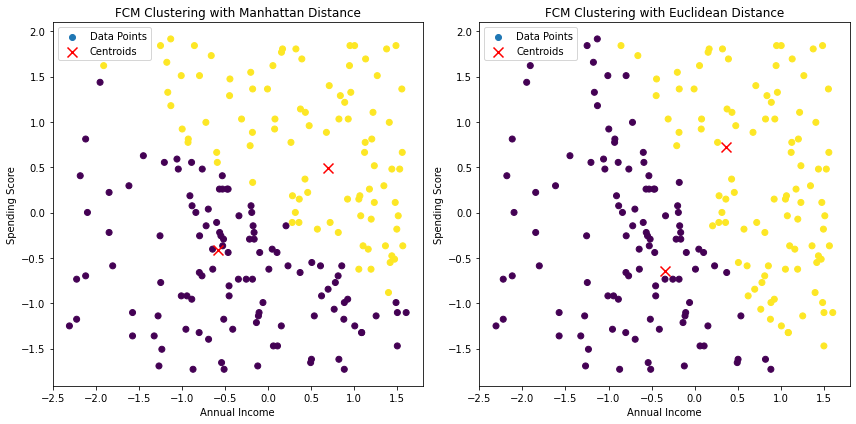

In [55]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot with cluster assignments for FCM model with Manhattan distance
axes[0].scatter(data['Annual Income'], data['Spending Score'], c=pred_M)
axes[0].scatter(centers_manhattan[:, 0], centers_manhattan[:, 1], c='red', marker='x', s=100)
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Spending Score')
axes[0].set_title('FCM Clustering with Manhattan Distance')
axes[0].legend(['Data Points', 'Centroids'])

# Scatter plot with cluster assignments for FCM model with Euclidean distance
axes[1].scatter(data['Annual Income'], data['Spending Score'], c=pred_E)
axes[1].scatter(centers_euclidean[:, 0], centers_euclidean[:, 1], c='red', marker='x', s=100)
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Spending Score')
axes[1].set_title('FCM Clustering with Euclidean Distance')
axes[1].legend(['Data Points', 'Centroids'])

plt.tight_layout()
plt.show()


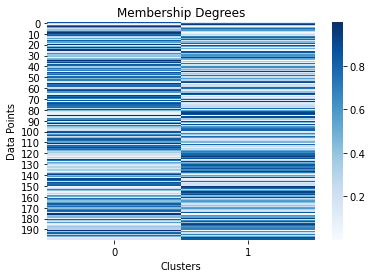

In [39]:
sns.heatmap(membership_degrees, cmap='Blues')
plt.xlabel('Clusters')
plt.ylabel('Data Points')
plt.title('Membership Degrees')
plt.show()

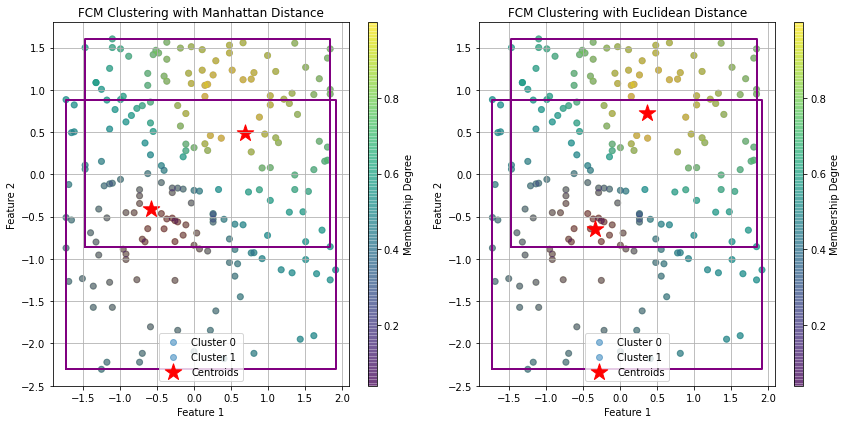

In [57]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot with membership degrees and borders for FCM model with Manhattan distance
for cluster_id in range(2):  # Assuming 2 clusters
    axes[0].scatter(dat[:, 0], dat[:, 1], c=membership_degrees[:, cluster_id], cmap='viridis', alpha=0.5, label=f'Cluster {cluster_id}')

# Plot centroids for FCM model with Manhattan distance
axes[0].scatter(centers_manhattan[:, 0], centers_manhattan[:, 1], marker='*', s=300, c='r', label='Centroids')

# Plot cluster borders for FCM model with Manhattan distance
for cluster_id in range(2):  # Assuming 2 clusters
    cluster_points = dat[membership == cluster_id]
    x_min, x_max = cluster_points[:, 0].min(), cluster_points[:, 0].max()
    y_min, y_max = cluster_points[:, 1].min(), cluster_points[:, 1].max()
    axes[0].plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], color='purple', linewidth=2)

axes[0].set_title('FCM Clustering with Manhattan Distance')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
# axes[0].colorbar(label='Membership Degree')
axes[0].legend()
axes[0].grid(True)

# Scatter plot with membership degrees and borders for FCM model with Euclidean distance
for cluster_id in range(2):  # Assuming 2 clusters
    axes[1].scatter(dat[:, 0], dat[:, 1], c=membership_degrees[:, cluster_id], cmap='viridis', alpha=0.5, label=f'Cluster {cluster_id}')

# Plot centroids for FCM model with Euclidean distance
axes[1].scatter(centers_euclidean[:, 0], centers_euclidean[:, 1], marker='*', s=300, c='r', label='Centroids')

# Plot cluster borders for FCM model with Euclidean distance
for cluster_id in range(2):  # Assuming 2 clusters
    cluster_points = dat[membership == cluster_id]
    x_min, x_max = cluster_points[:, 0].min(), cluster_points[:, 0].max()
    y_min, y_max = cluster_points[:, 1].min(), cluster_points[:, 1].max()
    axes[1].plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], color='purple', linewidth=2)

axes[1].set_title('FCM Clustering with Euclidean Distance')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
# axes[1].colorbar(label='Membership Degree')
axes[1].legend()
axes[1].grid(True)
# Add color bars outside the subplots
plt.colorbar(axes[0].collections[0], ax=axes[0], label='Membership Degree', aspect=40)
plt.colorbar(axes[1].collections[0], ax=axes[1], label='Membership Degree', aspect=40)

plt.tight_layout()
plt.show()